# Step 1 - Import Data
Importing data and reading from multiple .csv-files based on zip codes then creating a single combined dataframe. A 'City' column is added for later use.

In [8]:
import pandas as pd

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950','3000','3460']
energy_classes = ['A2020', 'A2015', 'A2010', 'B', 'C', 'D', 'E', 'F', 'G']
types = ['Villa','Ejerlejlighed','Rækkehus','Villalejlighed']

dataframes = []

for city in cities:
    filename = f'../data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Add a 'City' column with the zip code
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)  

combined_df[100:200:20]


,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url,City
100,Hvidegårdsparken 85,55.773286,12.529734,8495000,Villa,151,56258,C,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
120,Sophus Bauditz Vej 10,55.767861,12.481998,8250000,Villa,202,40841,E,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
140,"Lyngby Hovedgade 57B, 3. th",55.768505,12.506510,4745000,Ejerlejlighed,103,46067,E,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
160,Søager 19,55.743810,12.529096,7400000,Villa,104,71153,D,https://www.dingeo.dk/adresse/2820-gentofte/s%...,2820
180,"Søndersøvej 33A, st. mf",55.758706,12.535668,2195000,Ejerlejlighed,55,39909,C,https://www.dingeo.dk/adresse/2820-gentofte/s%...,2820


# Step 2 - Prepare data for test

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_df['Size'] = scaler.fit_transform(combined_df[['Size']])

# Remove rows with housetype "Landejendom"
combined_df = combined_df[combined_df['Type'] != 'Landejendom']

# Rows containing missing values are dropped
combined_df = combined_df.dropna()

# Convert categorigal variables to binary values
combined_df = pd.get_dummies(combined_df, columns=['City', 'Energy class', 'Type'])

# Normalize size in dataframe using StandardScaler
scaler = StandardScaler()
combined_df['Size'] = scaler.fit_transform(combined_df[['Size']])

# Find outliners, in this example lines variating with more than 3 times stadard deviation.
combined_df[abs(combined_df['Size']) > 3]


,Address,X,Y,Price,Size,Squaremeter price,Url,City_2800,City_2820,City_2830,...,Energy class_B,Energy class_C,Energy class_D,Energy class_E,Energy class_F,Energy class_G,Type_Ejerlejlighed,Type_Rækkehus,Type_Villa,Type_Villalejlighed
151,Nybrovej 375,55.774621,12.465637,72000000,8.185126,102272,https://www.dingeo.dk/adresse/2800-kongens%20l...,True,False,False,...,False,False,False,True,False,False,False,False,True,False
372,Birkevej 16,55.792640,12.443535,39900000,3.567546,103100,https://www.dingeo.dk/adresse/2830-virum/birke...,False,False,True,...,False,False,False,True,False,False,False,False,True,False
389,Søllerødgårdsvej 18,55.812178,12.501022,19800000,3.334482,53369,https://www.dingeo.dk/adresse/2840-holte/s%C3%...,False,False,False,...,False,False,True,False,False,False,False,False,True,False
473,Søbrinken 4,55.813732,12.460602,58000000,3.538413,150649,https://www.dingeo.dk/adresse/2840-holte/s%C3%...,False,False,False,...,False,False,True,False,False,False,False,False,True,False
602,Strandvejen 122,55.736762,12.575813,28500000,3.101418,80281,https://www.dingeo.dk/adresse/2900-hellerup/st...,False,False,False,...,False,False,False,True,False,False,False,False,True,False
635,Annasvej 30,55.739841,12.583573,72000000,3.392748,192000,https://www.dingeo.dk/adresse/2900-hellerup/an...,False,False,False,...,False,False,False,False,False,False,False,False,True,False
677,Onsgårdsvej 29,55.733203,12.580106,33950000,3.203384,93784,https://www.dingeo.dk/adresse/2900-hellerup/on...,False,False,False,...,False,False,False,True,False,False,False,False,True,False
684,Eggersvej 25,55.736621,12.551859,43000000,3.756911,107500,https://www.dingeo.dk/adresse/2900-hellerup/eg...,False,False,False,...,True,False,False,False,False,False,False,False,True,False
694,Hambros Alle 11,55.738004,12.578820,62000000,3.640379,158163,https://www.dingeo.dk/adresse/2900-hellerup/ha...,False,False,False,...,False,True,False,False,False,False,False,False,True,False
901,Skodsborg Strandvej 268A,55.837174,12.572639,58500000,4.718300,125536,https://www.dingeo.dk/adresse/2942-skodsborg/s...,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# Step 3 - Import model and run test

In [10]:
import pickle

# Import the model
with open('../models/linear_model.pkl', 'rb') as file:
    linear_model = pickle.load(file)

# Dataframe to store predicted results
df_results = pd.DataFrame()

# Run test on data
for idx, row in combined_df.iterrows():
    linenumber = idx

    original_price = combined_df.loc[linenumber, 'Price']

    new_data = {
        'X': combined_df.loc[linenumber, 'X'],
        'Y': combined_df.loc[linenumber, 'Y'],
        'Size': combined_df.loc[linenumber, 'Size'],
        'City_2800': combined_df.loc[linenumber, 'City_2800'],
        'City_2820': combined_df.loc[linenumber, 'City_2820'],
        'City_2830': combined_df.loc[linenumber, 'City_2830'],
        'City_2840': combined_df.loc[linenumber, 'City_2840'],
        'City_2850': combined_df.loc[linenumber, 'City_2850'],
        'City_2900': combined_df.loc[linenumber, 'City_2900'],
        'City_2920': combined_df.loc[linenumber, 'City_2920'],
        'City_2930': combined_df.loc[linenumber, 'City_2930'],
        'City_2942': combined_df.loc[linenumber, 'City_2942'],
        'City_2950': combined_df.loc[linenumber, 'City_2950'],
        'City_3000': combined_df.loc[linenumber, 'City_3000'],
        'City_3460': combined_df.loc[linenumber, 'City_3460'],
        'Energy class_A2010': combined_df.loc[linenumber, 'Energy class_A2020'],
        'Energy class_A2015': combined_df.loc[linenumber, 'Energy class_A2015'],
        'Energy class_A2020': combined_df.loc[linenumber, 'Energy class_A2010'],
        'Energy class_B': combined_df.loc[linenumber, 'Energy class_B'],
        'Energy class_C': combined_df.loc[linenumber, 'Energy class_C'],
        'Energy class_D': combined_df.loc[linenumber, 'Energy class_D'],
        'Energy class_E': combined_df.loc[linenumber, 'Energy class_E'],
        'Energy class_F': combined_df.loc[linenumber, 'Energy class_F'],
        'Energy class_G': combined_df.loc[linenumber, 'Energy class_G'],
        'Type_Ejerlejlighed': combined_df.loc[linenumber, 'Type_Ejerlejlighed'],
        'Type_Rækkehus': combined_df.loc[linenumber, 'Type_Rækkehus'],
        'Type_Villa': combined_df.loc[linenumber, 'Type_Villa'],
        'Type_Villalejlighed': combined_df.loc[linenumber, 'Type_Villalejlighed'],
    }

    # Create a new DataFrame with the new data to feed the model
    new_df = pd.DataFrame([new_data])
    
    # Make the prediction
    prediction = int(linear_model.predict(new_df))

    # Calculate the variance
    variance = original_price - prediction

    # Calculate variance in percent
    variance_percent = (variance / original_price) * 100

    # Create a temporary DataFrame with the current iteration's results
    temp_df = pd.DataFrame({'Predicted Price': [prediction],
                            'Original Price': [original_price],
                            'Variance': [variance],
                            'Variance %': [variance_percent]})
    
    # Concatenate the temporary DataFrame with the df_results DataFrame
    df_results = pd.concat([df_results, temp_df], ignore_index=True)


df_results[1:10]

,Predicted Price,Original Price,Variance,Variance %
1,5343744,4495000,-848744,-18.881958
2,10860887,7695000,-3165887,-41.142131
3,4349200,5295000,945800,17.862134
4,11931855,8750000,-3181855,-36.364057
5,2375592,3995000,1619408,40.535870
6,644656,2150000,1505344,70.016000
7,562425,2595000,2032575,78.326590
8,2886532,6195000,3308468,53.405456
9,8793197,5500000,-3293197,-59.876309


# Step 4 - Evaluate model performance

In [11]:
import numpy as np

# Calculate mean_variance_percent
mean_variance_percent = df_results['Variance %'].mean()

print(f"Mean Percentage Variance: {mean_variance_percent}")

# Define the bin boundaries and labels
bins = [-np.inf, -50, -20, 20, 50, np.inf]
bin_labels = ['Significantly Below Average', 'Moderate Below Average', 'Close to Average', 'Moderate Above Average', 'Significantly Above Average']

# Calculate the bin counts
bin_counts = pd.cut(df_results['Variance %'], bins, labels=bin_labels).value_counts()

# Apply the binning to the 'Variance %' column
df_results['Variance Category'] = pd.cut(df_results['Variance %'], bins=bins, labels=bin_labels)

# Print the bin counts
for label, count in bin_counts.items():
    print(f"{label}: {count}")




Mean Percentage Variance: 1.5422927073738197
Close to Average: 489
Moderate Below Average: 222
Moderate Above Average: 195
Significantly Below Average: 146
Significantly Above Average: 141


# Step 5 - Plot performance

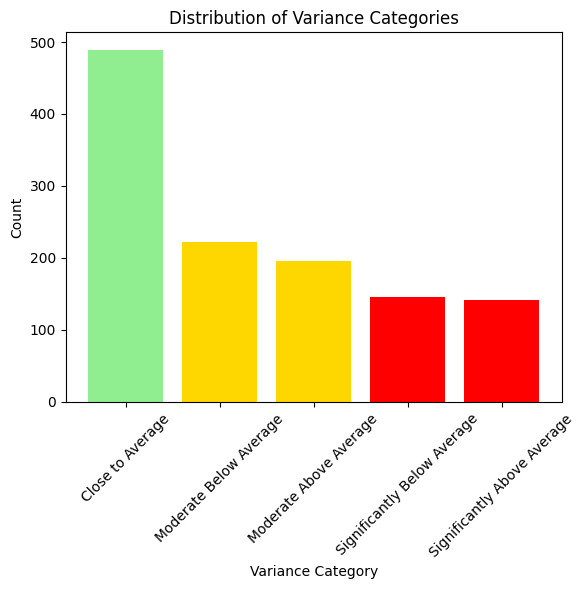

In [12]:
import matplotlib.pyplot as plt

colors = ['lightgreen', 'gold', 'gold', 'red', 'red']
plt.bar(bin_counts.index, bin_counts.values, color=colors)
plt.xlabel('Variance Category')
plt.ylabel('Count')
plt.title('Distribution of Variance Categories')
plt.xticks(rotation=45)
plt.show()